In [1]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv
from matplotlib import pyplot as plt

%matplotlib inline


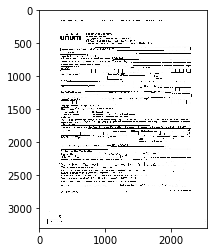

In [2]:
file_name = 'sample.jpg'
# Load the image
src = cv.imread(file_name, cv.IMREAD_COLOR)



# Show source image
plt.imshow(src)

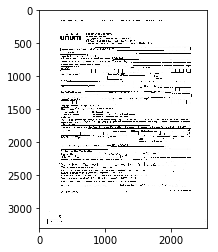

In [3]:
# Transform source image to gray if it is not already
if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src
# Show gray image
plt.imshow(gray, cmap='gray')

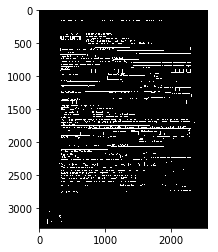

In [4]:
# Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 15, -2)
# Show binary image
plt.imshow(bw, cmap='gray')


In [17]:
bw.shape

(3300, 2550)

In [5]:
# Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)
vertical = np.copy(bw)

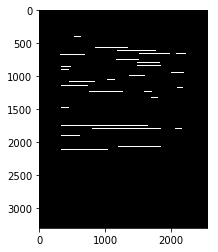

In [6]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = int(cols / 30)
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)
horizontal = cv.dilate(horizontal, horizontalStructure)
# Show extracted horizontal lines
plt.imshow(horizontal, cmap='gray')
#show_wait_destroy("horizontal", horizontal)

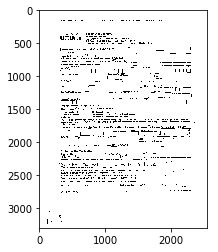

In [16]:
#inverse the image, so that lines are black for masking
horizontal_inv = cv.bitwise_not(horizontal)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv.bitwise_and(bw, bw, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv.bitwise_not(masked_img)
plt.imshow(masked_img_inv, cmap='gray')


In [18]:
plt.imsave('lines_removed', masked_img_inv, cmap='gray')


In [ ]:
# Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = int(rows / 30)
# Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
# Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
# Show extracted vertical lines
plt.imshow(vertical)

In [ ]:
# Inverse vertical image
vertical = cv.bitwise_not(vertical)
plt.imshow(vertical, cmap='gray')

'''
Extract edges and smooth image according to the logic
1. extract edges
2. dilate(edges)
3. src.copyTo(smooth)
4. blur smooth img
5. smooth.copyTo(src, edges)
'''



In [ ]:
# Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                            cv.THRESH_BINARY, 3, -2)

plt.imshow(edges, cmap='gray')

In [ ]:

# Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
plt.imshow(edges, cmap='gray')


In [ ]:

# Step 3
smooth = np.copy(vertical)
# Step 4
smooth = cv.blur(smooth, (2, 2))
# Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
# Show final result
plt.imshow(vertical, cmap='gray')

